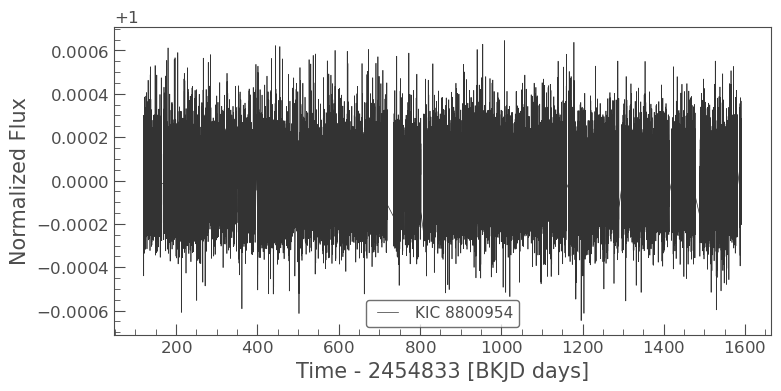

LightCurveCollection of 18 objects:
    0: <KeplerLightCurve LABEL="KIC 8800954" QUARTER=0 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    1: <KeplerLightCurve LABEL="KIC 8800954" QUARTER=1 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    2: <KeplerLightCurve LABEL="KIC 8800954" QUARTER=2 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    3: <KeplerLightCurve LABEL="KIC 8800954" QUARTER=3 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    4: <KeplerLightCurve LABEL="KIC 8800954" QUARTER=4 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    5: <KeplerLightCurve LABEL="KIC 8800954" QUARTER=5 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    6: <KeplerLightCurve LABEL="KIC 8800954" QUARTER=6 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    7: <KeplerLightCurve LABEL="KIC 8800954" QUARTER=7 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    8: <KeplerLightCurve LABEL="KIC 8800954" QUARTER=8 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    9: <KeplerLightCurve LABEL="KIC 8800954" QUARTER=9 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    10: <KeplerLightCurv

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy
import lightkurve as lk

klc = lk.search_lightcurve("Kepler-421", author="Kepler", cadence="long")
klc_collection = klc.download_all()
klc_stitched = klc_collection.stitch().flatten(window_length = 901).remove_outliers()
klc_stitched.plot()
plt.show()
klc_collection

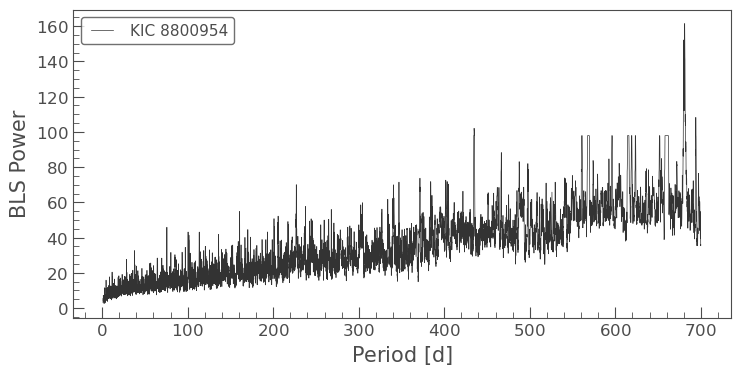

In [43]:
period = np.linspace(1, 700, 10000)
bls_b = klc_stitched.to_periodogram(method = 'bls', period = period, frequency_factor = 500)
bls_b.plot()
plt.show()

In [44]:
period_b = bls_b.period_at_max_power
transit_time_b = bls_b.transit_time_at_max_power
duration_b = bls_b.duration_at_max_power

print('planet b period = ' + str(period_b))

planet b period = 681.125112511251 d


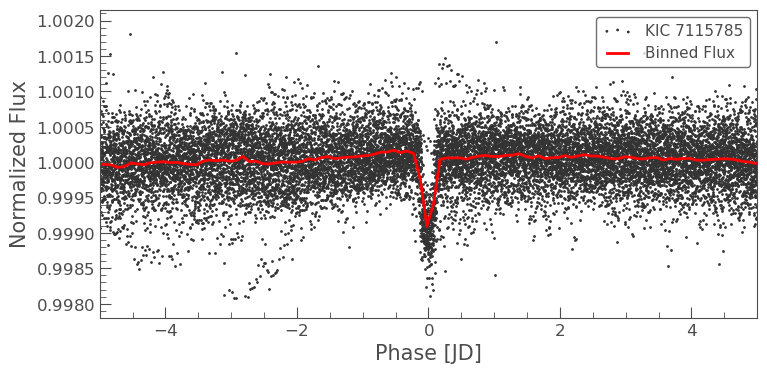

In [33]:
correction = 1
ax = klc_stitched.fold(period = period_b*correction, epoch_time = transit_time_b).scatter()
klc_stitched.fold(period_b*correction, transit_time_b).bin(.1).plot(ax=ax, c='r', lw=2, label='Binned Flux')
ax.set_xlim(-5, 5)
plt.show()

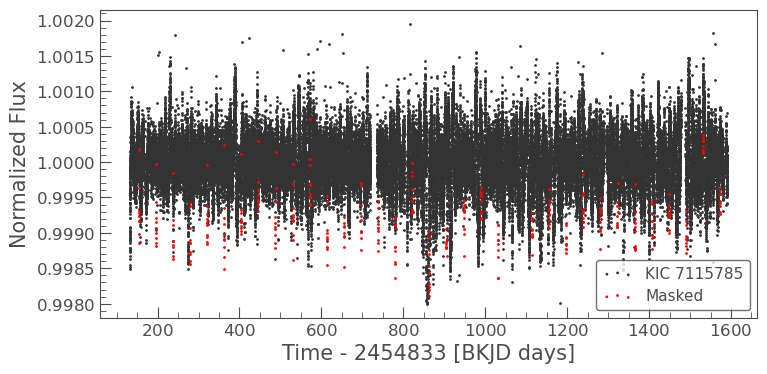

In [34]:
b_planet_mask = klc_stitched.create_transit_mask(period = [period_b], transit_time = [transit_time_b], duration = [duration_b])
masked_lc_b = klc_stitched[~b_planet_mask]
ax = masked_lc_b.scatter()
klc_stitched[b_planet_mask].scatter(ax = ax, c = 'r', label = 'Masked')
plt.show()

In [35]:
#b_planet_model = bls_b.get_transit_model(period = period_b, transit_time = transit_time_b, duration = duration_b)
#ax = klc_stitched.fold(period_b, transit_time_b).scatter()
#b_planet_model.fold(period_b, transit_time_b).plot(ax = ax, c = 'r', lw = 2)
#plt.show()

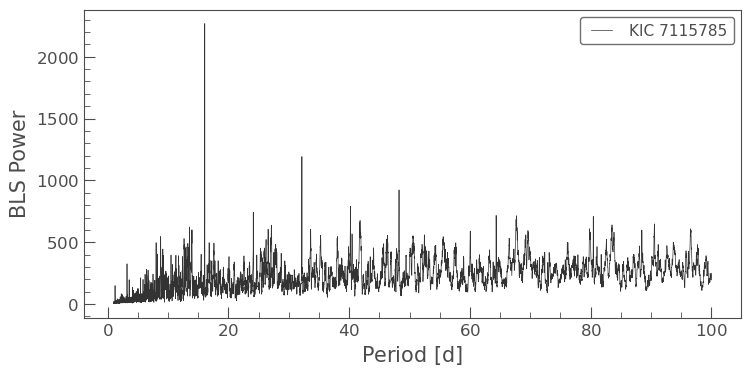

In [36]:
period = np.linspace(1, 100, 10000)
bls_c = masked_lc_b.to_periodogram(method = 'bls', period = period, frequency_factor = 500)
bls_c.plot()
plt.show()

In [37]:
period_c = bls_c.period_at_max_power
transit_time_c = bls_c.transit_time_at_max_power
duration_c = bls_c.duration_at_max_power

print('planet c period = ' + str(period_c))

planet c period = 16.089108910891092 d


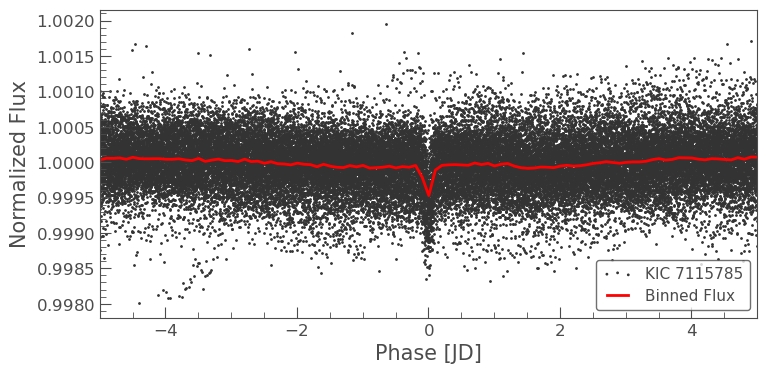

In [38]:
ax = masked_lc_b.fold(period = period_c, epoch_time = transit_time_c).scatter()
masked_lc_b.fold(period_c, transit_time_c).bin(.1).plot(ax=ax, c='r', lw=2, label='Binned Flux')
ax.set_xlim(-5, 5)
plt.show()

In [39]:
#c_planet_model = bls_c.get_transit_model(period = period_c, transit_time = transit_time_c, duration = duration_c)
#ax = klc_stitched.fold(period_c, transit_time_c).scatter()
#c_planet_model.fold(period_c, transit_time_c).plot(ax = ax, c = 'r', lw = 2)
#plt.show()

In [40]:
c_planet_mask = klc_stitched.create_transit_mask(period = [period_b, period_c], transit_time = [transit_time_b, transit_time_c], duration = [duration_b, duration_c])
masked_lc_c = klc_stitched[~c_planet_mask]
#ax = masked_lc_c.scatter()
#klc_stitched[c_planet_mask].scatter(ax = ax, c = 'r', label = 'Masked')
#plt.show()

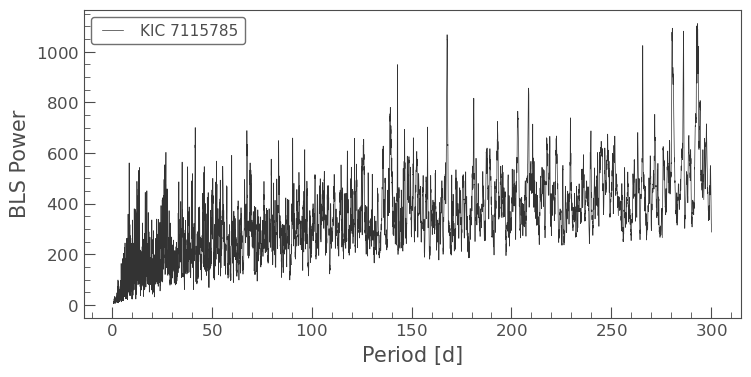

In [41]:
period = np.linspace(1, 300, 10000)
bls_d = masked_lc_c.to_periodogram(method = 'bls', period = period, frequency_factor = 500)
bls_d.plot()
plt.show()

In [443]:
period_d = bls_d.period_at_max_power
transit_time_d = bls_d.transit_time_at_max_power
duration_d = bls_d.duration_at_max_power

print('planet d period = ' + str(period_d))

planet d period = 6.427542754275427 d


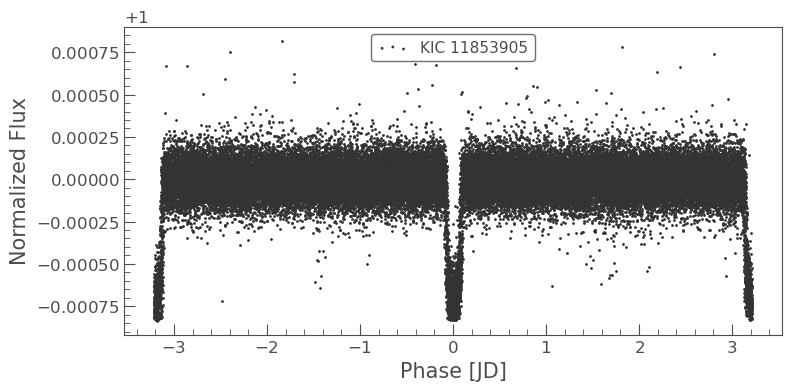

In [444]:
ax = klc_stitched.fold(period = period_d, epoch_time = transit_time_d).scatter()
plt.show()

In [445]:
#d_planet_model = bls_d.get_transit_model(period = period_d, transit_time = transit_time_d, duration = duration_d)
#ax = klc_stitched.fold(period_d, transit_time_d).scatter()
#d_planet_model.fold(period_d, transit_time_d).plot(ax = ax, c = 'r', lw = 2)
#plt.show()

In [446]:
d_planet_mask = klc_stitched.create_transit_mask(period = [period_b, period_c, period_d], transit_time = [transit_time_b, transit_time_c, transit_time_d], duration = [duration_b, duration_c, duration_d])
masked_lc_d = klc_stitched[~d_planet_mask]
#ax = masked_lc_d.scatter()
#klc_stitched[d_planet_mask].scatter(ax = ax, c = 'r', label = 'Masked')
#plt.show()

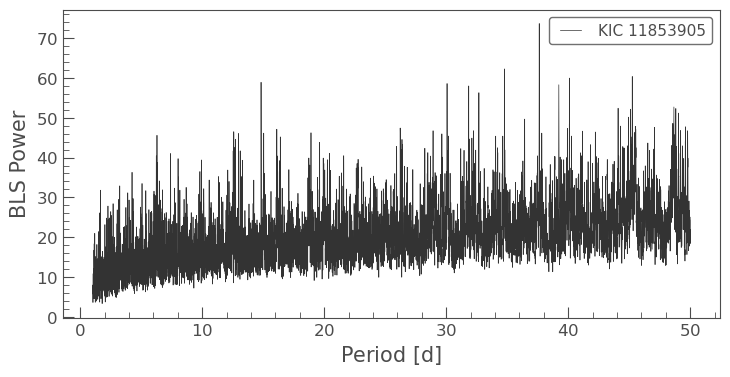

In [451]:
period = np.linspace(1, 50, 10000)
bls_e = masked_lc_d.to_periodogram(method = 'bls', period = period, frequency_factor = 500)
bls_e.plot()
plt.show()

In [449]:
period_e = bls_e.period_at_max_power
transit_time_e = bls_e.transit_time_at_max_power
duration_e = bls_e.duration_at_max_power

print('planet d period = ' + str(period_e))

planet d period = 6.305130513051305 d


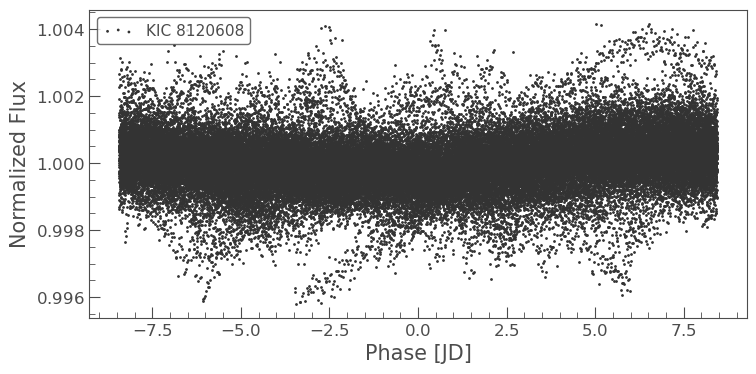

In [334]:
ax = klc_stitched.fold(period = period_e, epoch_time = transit_time_e).scatter()
plt.show()